<a href="https://colab.research.google.com/github/prof-rossetti/intro-to-python/blob/master/exercises/chart-gallery/Chart_Gallery_Exercise_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Chart Gallery" Exercise

Dataviz Packages:

  + [The `matplotlib` Package](https://github.com/prof-rossetti/intro-to-python/blob/master/notes/python/packages/matplotlib.md)
  + [The `plotly` Package](https://github.com/prof-rossetti/intro-to-python/blob/master/notes/python/packages/plotly.md) 

Dataviz Packages for Pandas DataFrames:

  + [The `plotly.express` Package](https://plotly.com/python/plotly-express/) (recommended)
  + [The `altair` Package](https://github.com/prof-rossetti/intro-to-python/blob/master/notes/python/packages/altair.md)
  + [The `seaborn` Package](https://github.com/prof-rossetti/intro-to-python/blob/master/notes/python/packages/seaborn.md) (recommended)

## Instructions

Choose a dataviz package, and use it to make at least three different kinds of charts (bar, line, pie). 

If you start using one package and decide you'd like to switch, that's ok. Go for it. Get a feel for which package(s) you prefer.

You might choose a package based on clarity of  documentation, popularity on GitHub, community support, etc.

## Recommended Dataviz Approach 

  1. Find the **official documentation** and **example charts** for the type of chart you want to make.
  2. Reproduce an example chart using **example data** from the documentation.
  2. Transform **your data** into the same structure as the example data, and pass it to the chart. 
  3. Customize chart **style, formatting, and options** as desired.




# Setup

In [ ]:
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px


# Line Charts

In [ ]:

#
# LINE DATA
#

line_data = [
    {"date": "2020-10-01", "stock_price_usd": 100.00},
    {"date": "2020-10-02", "stock_price_usd": 101.01},
    {"date": "2020-10-03", "stock_price_usd": 120.20},
    {"date": "2020-10-04", "stock_price_usd": 107.07},
    {"date": "2020-10-05", "stock_price_usd": 142.42},
    {"date": "2020-10-06", "stock_price_usd": 135.35},
    {"date": "2020-10-07", "stock_price_usd": 160.60},
    {"date": "2020-10-08", "stock_price_usd": 162.62},
]

line_df = DataFrame(line_data)
print(line_df.head())


         date  stock_price_usd
0  2020-10-01           100.00
1  2020-10-02           101.01
2  2020-10-03           120.20
3  2020-10-04           107.07
4  2020-10-05           142.42


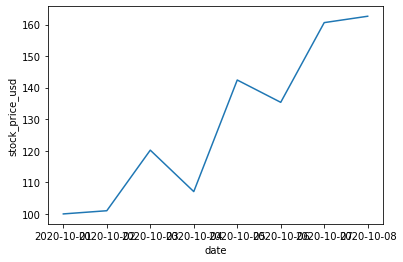

In [ ]:

# https://seaborn.pydata.org/generated/seaborn.lineplot.html
sns.lineplot(data=line_df, x="date", y="stock_price_usd")

# can we do better? 
# how about more visible dates on the x axis?
# how about axis titles?
# how about a chart title?




No handles with labels found to put in legend.


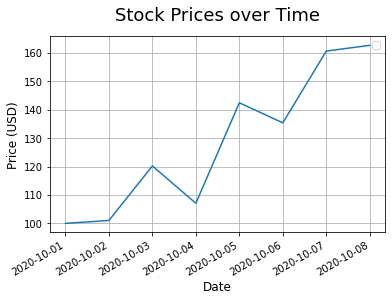

In [ ]:
sns.lineplot(data=line_df, x="date", y="stock_price_usd")

plt.legend()
plt.grid()

plt.title("Stock Prices over Time", fontsize=18, y=1.05)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gcf().autofmt_xdate() # rotate x labels so we can see the dates

plt.savefig("stock_prices_over_time.png")
plt.show()

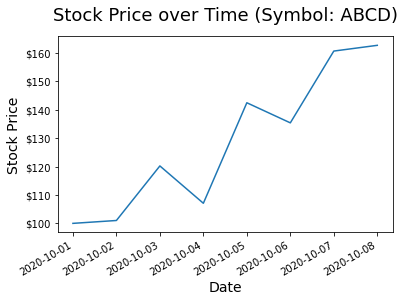

In [ ]:
# see: https://matplotlib.org/examples/pylab_examples/custom_ticker1.html
# ... https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib

from matplotlib.ticker import FuncFormatter

def axis_usd(price):
    #return f"${price:,.2f}"
    return f"${price:,.0f}"

def axis_tick_formatter(x, pos):
    """
    The FuncFormatter wants a function with two args:
    ... first, the value to format (x)
    ... then the tick position (pos) which we can ignore in this case
    """
    return axis_usd(x)

# seaborn plot can play well with matplotlib 
ax = sns.lineplot(data=line_df, x="date", y="stock_price_usd")

# can use matplotlib to customize titles 
plt.title("Stock Price over Time (Symbol: ABCD)", fontsize=18, y=1.05)
plt.ylabel("Stock Price", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# this is the magic of formatting the axis
# can use with yaxis or xaxis
# the function we pass to FuncFormatter must take two params, where the first is the value to format
ax.yaxis.set_major_formatter(FuncFormatter(axis_tick_formatter)) # format y axis labels as usd

# rotate x labels so we can see the dates (FYI: this apparently works with non-date values as well!)
plt.gcf().autofmt_xdate() 


In [ ]:
# https://plotly.com/python/line-charts/
px.line(line_df, x="date", y="stock_price_usd")

# Bar Charts

In [ ]:

#
# BAR DATA
#

bar_data = [
    {"genre": "Thriller", "viewers": 123456},
    {"genre": "Mystery", "viewers": 234567},
    {"genre": "Sci-Fi", "viewers": 987654},
    {"genre": "Fantasy", "viewers": 876543},
    {"genre": "Documentary", "viewers": 283105},
    {"genre": "Action", "viewers": 544099},
    {"genre": "Romantic Comedy", "viewers": 121212}
]

bar_df = DataFrame(bar_data)
print(bar_df.head())

         genre  viewers
0     Thriller   123456
1      Mystery   234567
2       Sci-Fi   987654
3      Fantasy   876543
4  Documentary   283105


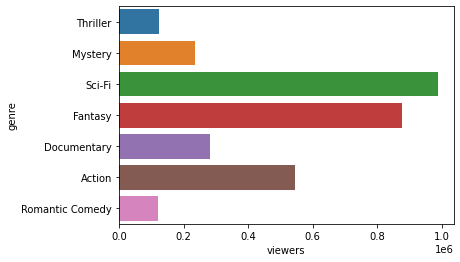

In [ ]:

# https://seaborn.pydata.org/generated/seaborn.barplot.html
ax = sns.barplot(data=bar_df, x="viewers", y="genre")


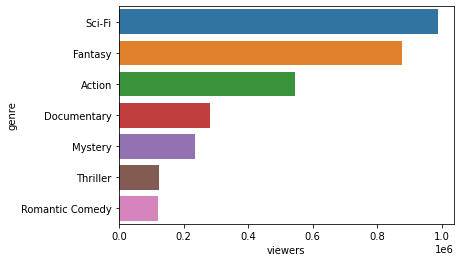

In [ ]:

# can we do better? let's sort the bars, make axis titles, etc.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

sorted_bar_df = bar_df.sort_values(by="viewers", ascending=False)

ax = sns.barplot(data=sorted_bar_df, x="viewers", y="genre")

In [ ]:

# https://plotly.com/python/bar-charts/
px.bar(sorted_bar_df, orientation="h", x="viewers", y="genre", color="genre")



# Pie Charts

In [ ]:

#
# PIE DATA
#

pie_data = [
    {"company": "Company X", "market_share": 0.55},
    {"company": "Company Y", "market_share": 0.30},
    {"company": "Company Z", "market_share": 0.15}
]

pie_df = DataFrame(pie_data)
print(pie_df.head())


     company  market_share
0  Company X          0.55
1  Company Y          0.30
2  Company Z          0.15


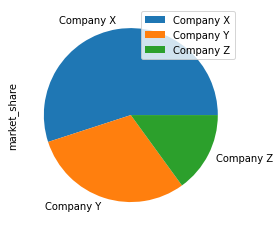

In [ ]:

# doesn't look like seaborn has a pie, but pandas does
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot

#pie_df["market_share"].plot.pie()

#pie_df.plot.pie(x="company", y="market_share")

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html
pie_df.set_index("company").plot.pie(y="market_share")


In [ ]:

# https://plotly.com/python/pie-charts/

px.pie(pie_df, values="market_share", names="company", title="Market Share by Company")

# Scatter Plots

In [ ]:

#
# SCATTER DATA
#

scatter_data = [
    {"income": 30_000, "life_expectancy": 65.5},
    {"income": 30_000, "life_expectancy": 62.1},
    {"income": 50_000, "life_expectancy": 66.7},
    {"income": 50_000, "life_expectancy": 71.0},
    {"income": 70_000, "life_expectancy": 72.5},
    {"income": 70_000, "life_expectancy": 77.3},
    {"income": 90_000, "life_expectancy": 82.9},
    {"income": 90_000, "life_expectancy": 80.0},
]

scatter_df = DataFrame(scatter_data)
print(scatter_df.head())


   income  life_expectancy
0   30000             65.5
1   30000             62.1
2   50000             66.7
3   50000             71.0
4   70000             72.5


In [ ]:

import plotly.express as px

px.scatter(scatter_df, x='income', y='life_expectancy'
    #, trendline="ols" 
    #, color="life_expectancy", 
)

# Histograms



In [ ]:

#
# HISTOGRAM DATA
#

histo_data = [
    {"user": "User A", "average_opinion": 0.1},
    {"user": "User B", "average_opinion": 0.4},
    {"user": "User C", "average_opinion": 0.4},
    {"user": "User D", "average_opinion": 0.8},
    {"user": "User E", "average_opinion": 0.86},
    {"user": "User F", "average_opinion": 0.75},
    {"user": "User G", "average_opinion": 0.90},
    {"user": "User H", "average_opinion": 0.99},
]

histo_df = DataFrame(histo_data)
print(histo_df.head())

     user  average_opinion
0  User A             0.10
1  User B             0.40
2  User C             0.40
3  User D             0.80
4  User E             0.86


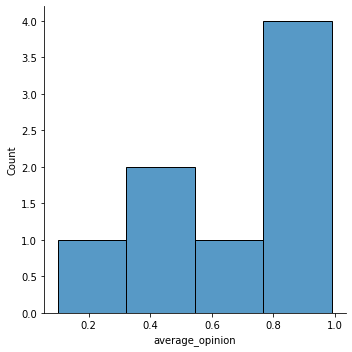

In [ ]:

#import matplotlib.pyplot as plt

import seaborn as sns

sns.displot(histo_df, x="average_opinion") # https://seaborn.pydata.org/tutorial/distributions.html

#plt.title("Distribution of Fraud Scores")
#plt.show()

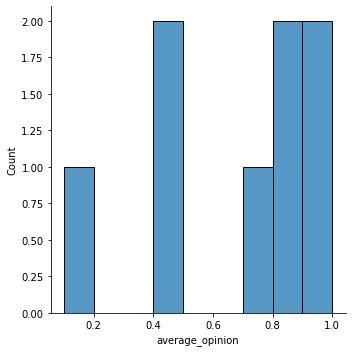

In [ ]:
sns.displot(histo_df, x="average_opinion", binwidth=0.1) # https://seaborn.pydata.org/tutorial/distributions.html
